<a href="https://colab.research.google.com/github/Jashmavani9002/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

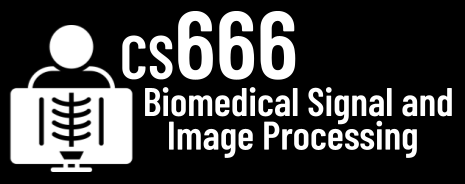
#Assignment 5

In [1]:
# NAME: JASHKUMAR MAVANI

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.5 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [6]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-12 14:07:58--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2024-04-12 14:07:58 (70.4 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [7]:
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('/content/ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [10]:
# TODO: 220

In [11]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

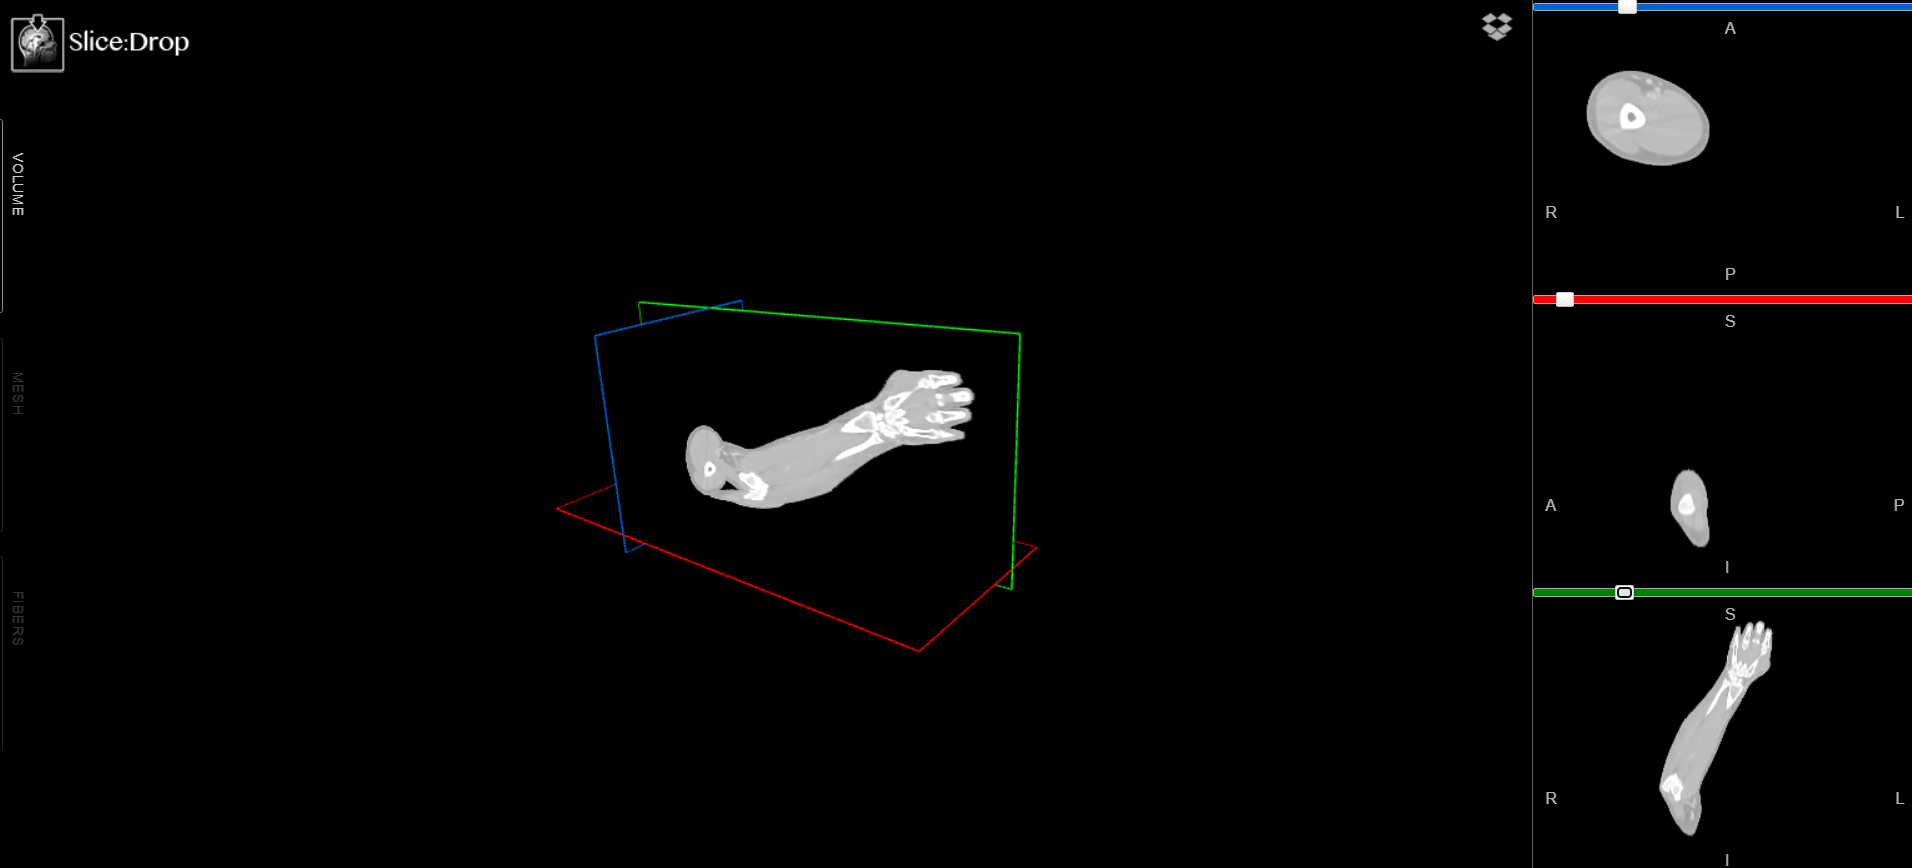

In [13]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [14]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

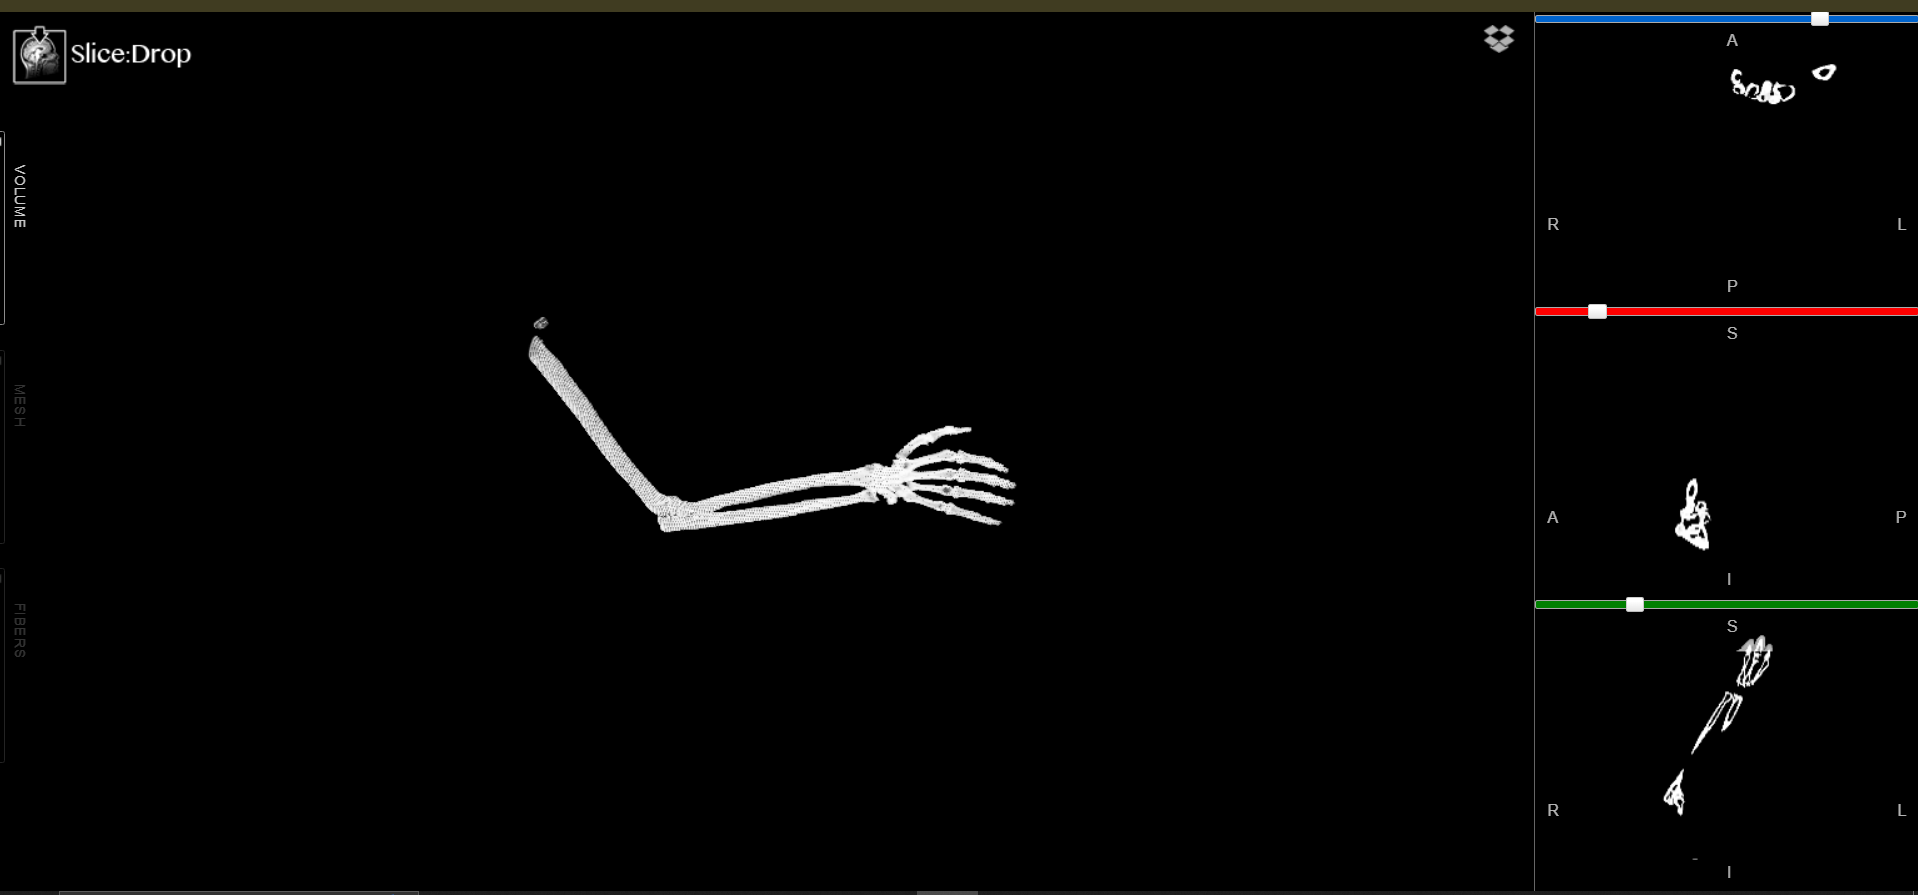

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread
import os

In [24]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
DIR = "/content/ct"

filenames = sorted(os.listdir(DIR))
# print(filenames)
size = len(filenames)
img = dcmread(os.path.join(DIR, filenames[0]))
row, col = img.Rows, img.Columns
print(f"Dimensions: {row} x {col}")


Dimensions: 454 x 512


In [36]:
arr = np.empty((size, row, col), dtype=np.int32)

for i, filename in enumerate(filenames):
    dicomFile = dcmread(os.path.join(DIR, filename))
    hu_pixels = dicomFile.pixel_array
    arr[i] = hu_pixels
    # print(f"Loaded file {filename} ({i+1}/{size})")

# print(arr)

In [37]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

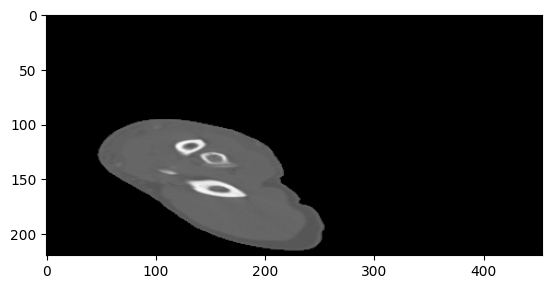

In [38]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(arr[:,:,100], cmap='gray')
plt.show()

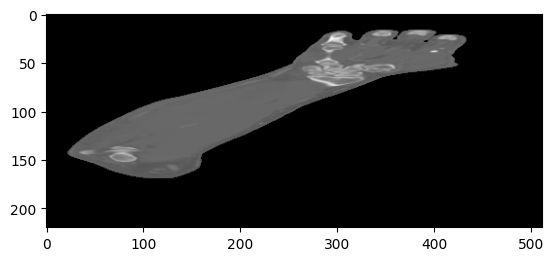

In [39]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(arr[:,100,:], cmap='gray')
plt.show()

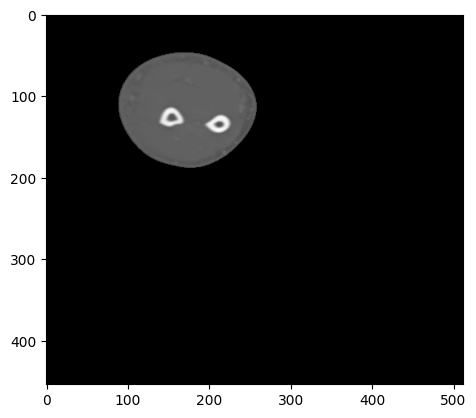

In [40]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(arr[100,:,:], cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [41]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [42]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

window: 410 
Level: 30 
Vmin : -175.0 
vmax: 235.0 
Rescale: -1024 


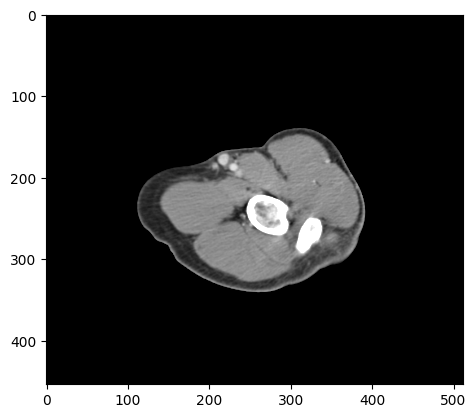

In [50]:
# TODO: YOUR CODE

window = dicomFile.WindowWidth
level = dicomFile.WindowCenter

vmin = level - (window/2)
vmax = level + (window/2)

rescale = dicomFile.RescaleIntercept

print(f"window: {window} \nLevel: {level} \nVmin : {vmin} \nvmax: {vmax} \nRescale: {rescale} ")

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [44]:
# 2) Play around with different Window/Level values that enhance
# the visualization.


Vmin : 200 
vmax: 250 
Rescale: -1024 


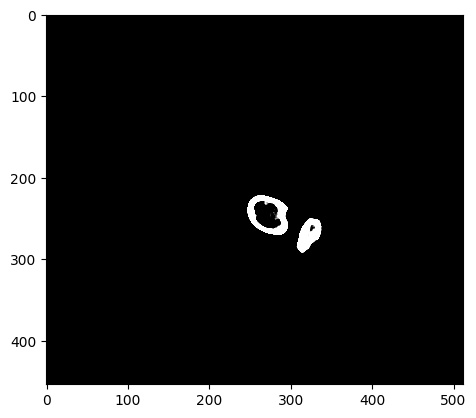

In [51]:
# TODO: YOUR CODE
vmin = 200
vmax = 240
rescale = dicomFile.RescaleIntercept

print(f"\nVmin : {vmin} \nvmax: {vmax} \nRescale: {rescale} ")

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

Choosing the values vmin=200 and vmax=240 is better than using vmin=-175 and vmax=235. This is because higher values like 200 and 240 make bones stand out more in the image, as they shift towards the white scale. On the other hand, tissues and fats, with their lower hounsfield unit values, appear darker.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

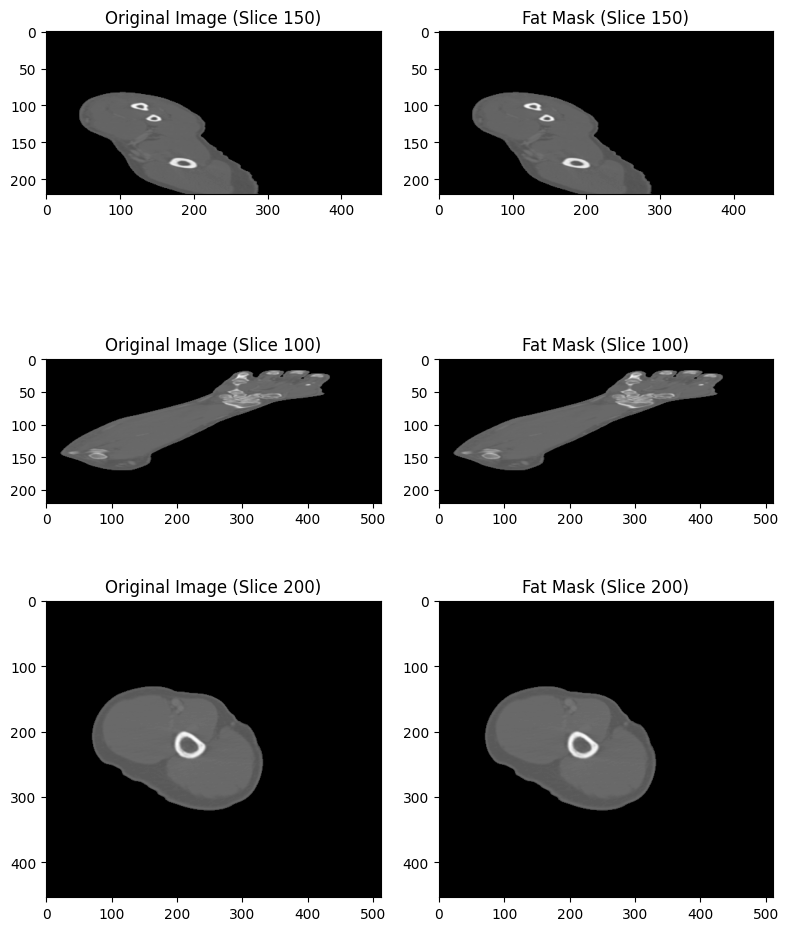

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = arr.copy()
fat_mask[(fat_mask >= -70) & (fat_mask < -30)] = 0
fat_mask = fat_mask.astype(np.int16)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

# Slice 150
axs[0, 0].imshow(arr[:, :, 150], cmap='gray')
axs[0, 0].set_title('Original Image (Slice 150)')
axs[0, 1].imshow(fat_mask[:, :, 150], cmap='gray', alpha=1)
axs[0, 1].set_title('Fat Mask (Slice 150)')

# Slice 100
axs[1, 0].imshow(arr[:, 100, :], cmap='gray')
axs[1, 0].set_title('Original Image (Slice 100)')
axs[1, 1].imshow(fat_mask[:, 100, :], cmap='gray', alpha=1)
axs[1, 1].set_title('Fat Mask (Slice 100)')

# Slice 200
axs[2, 0].imshow(arr[200, :, :], cmap='gray')
axs[2, 0].set_title('Original Image (Slice 200)')
axs[2, 1].imshow(fat_mask[200, :, :], cmap='gray', alpha=1)
axs[2, 1].set_title('Fat Mask (Slice 200)')

plt.tight_layout()
plt.show()

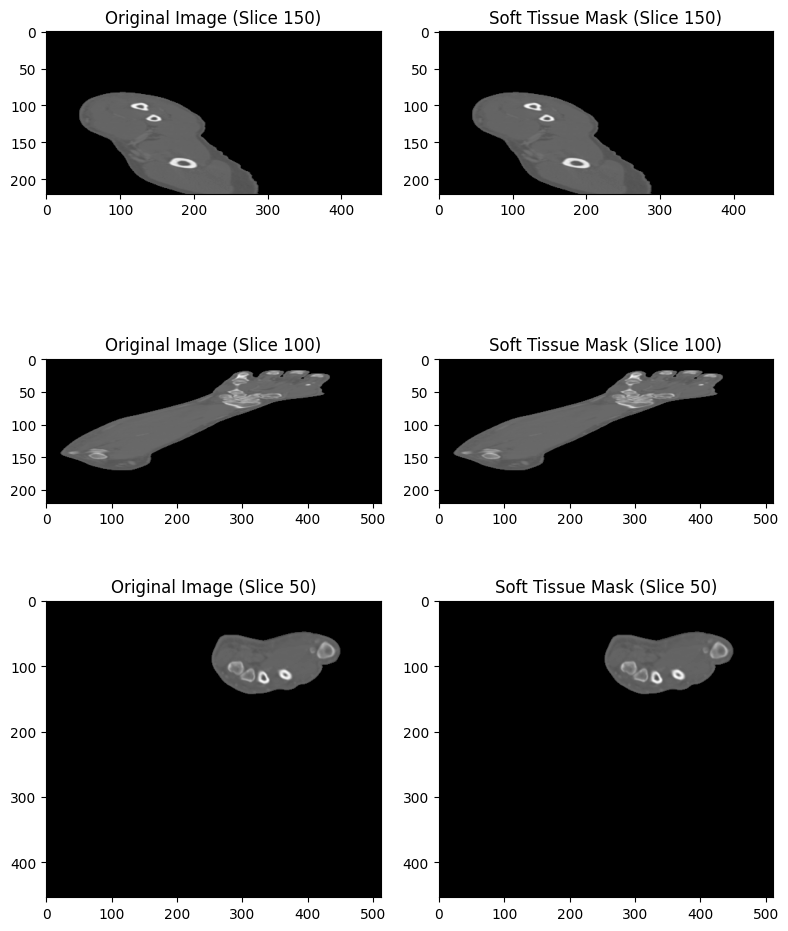

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_mask = arr.copy()
soft_tissue_mask[(soft_tissue_mask >= 20) & (soft_tissue_mask < 40)] = 0
soft_tissue_mask = soft_tissue_mask.astype(np.int16)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

# Slice 150
axs[0, 0].imshow(arr[:, :, 150], cmap='gray')
axs[0, 0].set_title('Original Image (Slice 150)')
axs[0, 1].imshow(soft_tissue_mask[:, :, 150], cmap='gray', alpha=1)
axs[0, 1].set_title('Soft Tissue Mask (Slice 150)')

# Slice 100
axs[1, 0].imshow(arr[:, 100, :], cmap='gray')
axs[1, 0].set_title('Original Image (Slice 100)')
axs[1, 1].imshow(soft_tissue_mask[:, 100, :], cmap='gray', alpha=1)
axs[1, 1].set_title('Soft Tissue Mask (Slice 100)')

# Slice 50
axs[2, 0].imshow(arr[50, :, :], cmap='gray')
axs[2, 0].set_title('Original Image (Slice 50)')
axs[2, 1].imshow(soft_tissue_mask[50, :, :], cmap='gray', alpha=1)
axs[2, 1].set_title('Soft Tissue Mask (Slice 50)')

plt.tight_layout()
plt.show()

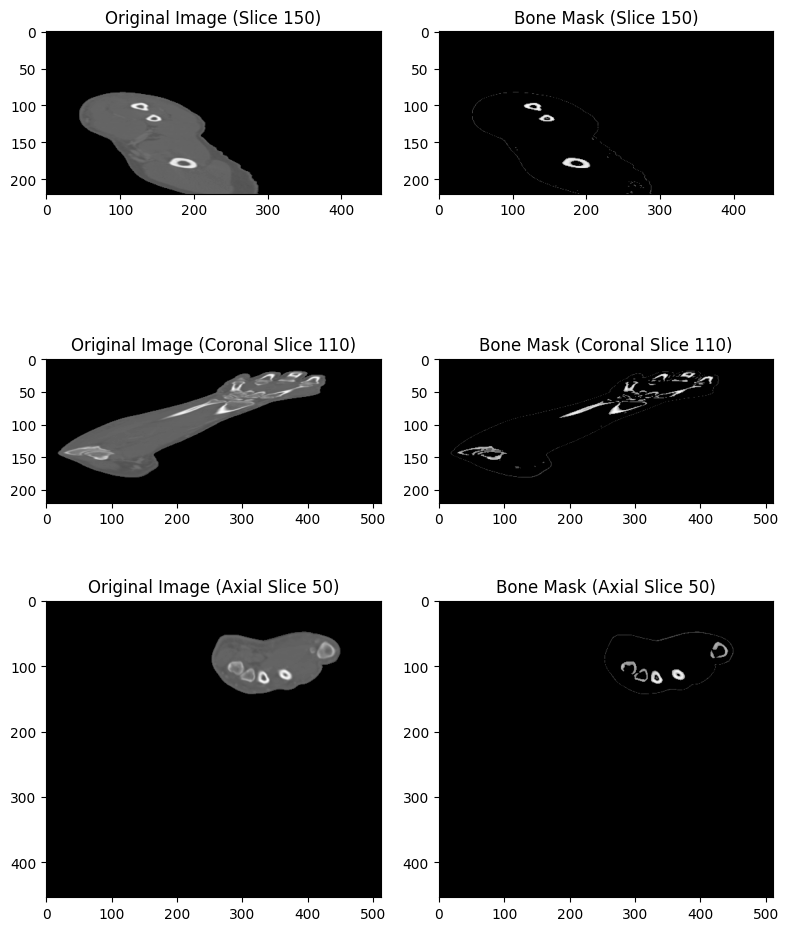

In [62]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = arr.copy()
bone_mask[(bone_mask >= 900) & (bone_mask < 1500)] = 0
bone_mask = bone_mask.astype(np.int16)

fig, axs = plt.subplots(3, 2, figsize=(8, 10))

# Slice 150
axs[0, 0].imshow(arr[:, :, 150], cmap='gray')
axs[0, 0].set_title('Original Image (Slice 150)')
axs[0, 1].imshow(bone_mask[:, :, 150], cmap='gray', alpha=1)
axs[0, 1].set_title('Bone Mask (Slice 150)')

# Slice 110 (Coronal view)
axs[1, 0].imshow(arr[:, 110, :], cmap='gray')
axs[1, 0].set_title('Original Image (Coronal Slice 110)')
axs[1, 1].imshow(bone_mask[:, 110, :], cmap='gray', alpha=1)
axs[1, 1].set_title('Bone Mask (Coronal Slice 110)')

# Slice 50
axs[2, 0].imshow(arr[50, :, :], cmap='gray')
axs[2, 0].set_title('Original Image (Axial Slice 50)')
axs[2, 1].imshow(bone_mask[50, :, :], cmap='gray', alpha=1)
axs[2, 1].set_title('Bone Mask (Axial Slice 50)')

plt.tight_layout()
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

Yes, As per above graph we can see good segmentations.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""